## **Machine Learning (ML) - Classification**
### *Credit Card customers Predict Churning customers*

### **Introduction**
in this project the main thing is to predict between credit card and customers in general by using classification models for example :a manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction.

### We will answer some questions, which are:
* What is the most Income Category based on Attrition Flag?
* Is the Education Level affect on the Income Category?
* Does `Customer_Age` influnce the `Marital_Status`?
* Which income category can be types with card category?


### **Data Features**
#### **1. CLIENTNUM**
Client number nique identifier for the customer holding the account.

#### **2. Attrition_Flag**
Internal event (customer activity) variable - if the account is closed then 1 else 0.

#### **3. Customer_Age**
Demographic variable - Customers Age in Years

#### **4. Gender**
Demographic variable - M=Male, F=Female

#### **5. Dependent_count**
Demographic variable - Number of dependents.

#### **6. Education_Level**
Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.).

#### **7. Marital_Status**
Demographic variable - Married, Single, Divorced, Unknown

#### **8. Income_Category**
Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, Unknown)

#### **9. Card_Category**
Product Variable - Type of Card (Blue, Silver, Gold, Platinum)

#### **10. Months_on_book**
Period of relationship with bank


# **Part 1: Exploratory Data Analysis (EDA)**

### Import libraries and load the dataset

In [1]:
! pip install lightgbm 

In [2]:
! pip install imblearn

In [3]:
! pip install xgboost

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
import sklearn
warnings.filterwarnings('ignore')
%matplotlib inline

# Importing SKLearn clssifiers and libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import preprocessing
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTENC
from sklearn.metrics import plot_confusion_matrix
from imblearn.pipeline import Pipeline


In [5]:
df = pd.read_csv('BankChurners.csv')

In [6]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [7]:
#I dropped these columns because it has unnecessary values, and it just takes space
drop_columns = ['CLIENTNUM',
                'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
df = df.drop(drop_columns,errors='ignore',axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [9]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [10]:
df.shape

(10127, 20)

In [11]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [12]:
df.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [13]:
def plot_outliers(df,col):
    plt.title(col)
    ax = sns.boxplot(data=df, x=col)
    ax.set(xlabel='')
    plt.show()

def plot_hist(df,col):
    plt.hist(x=df[col],bins=40,color='#D11239')
    plt.show();

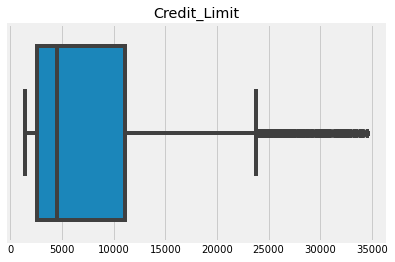

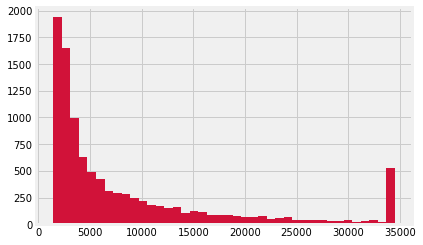

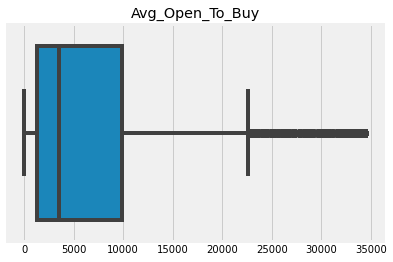

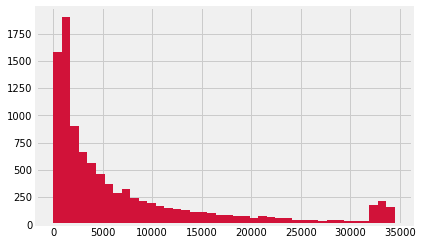

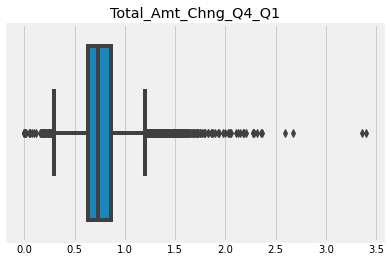

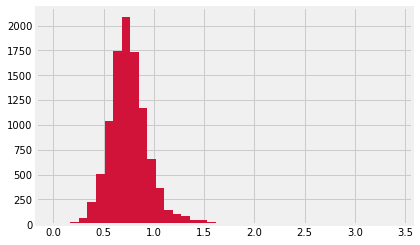

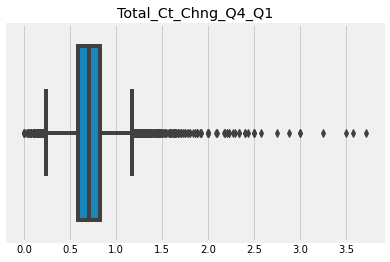

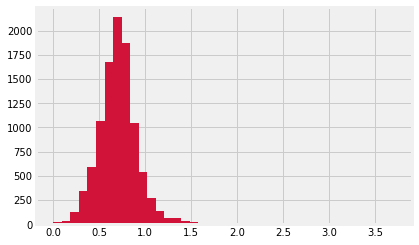

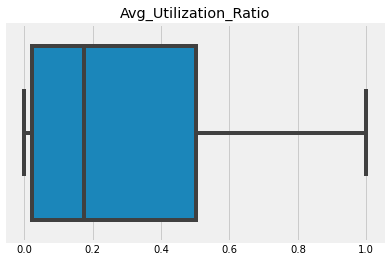

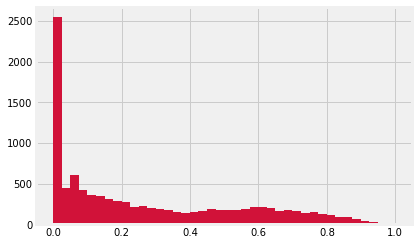

In [14]:
for col in df.columns:
    if df[col].dtype == 'float64':
        plot_outliers(df,col)
        plot_hist(df,col)

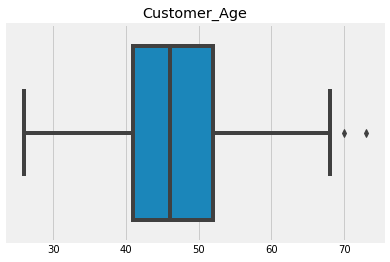

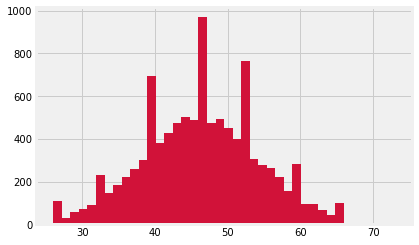

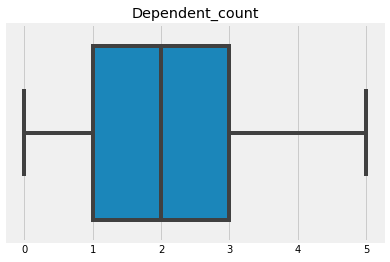

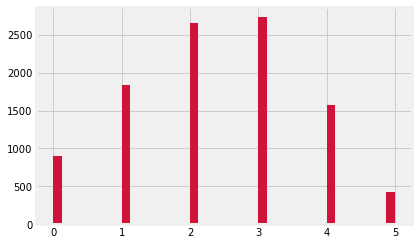

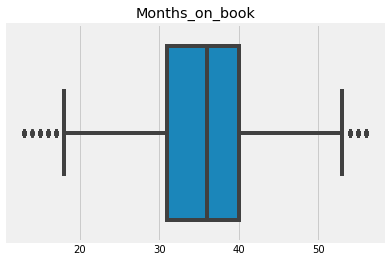

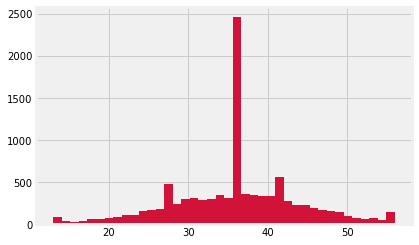

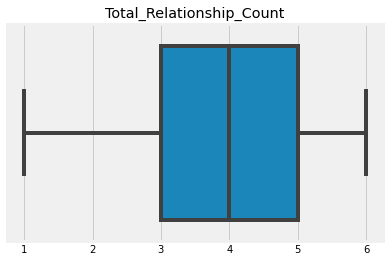

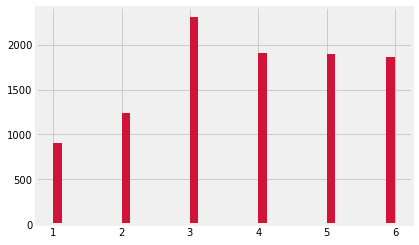

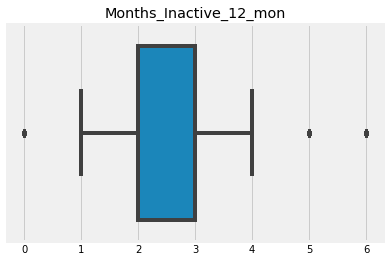

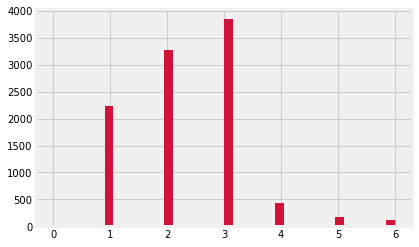

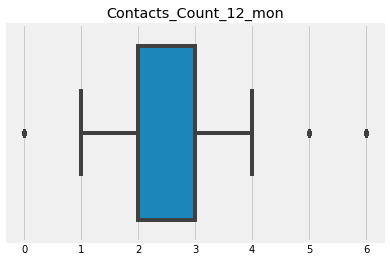

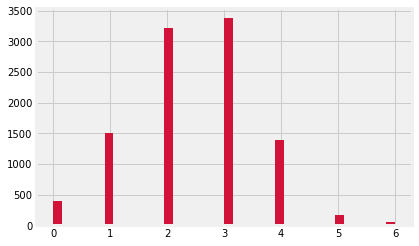

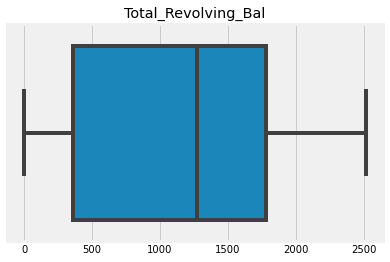

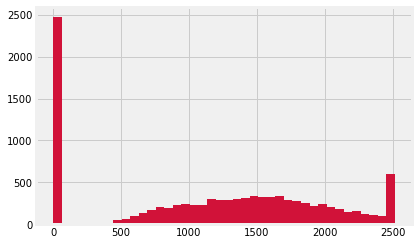

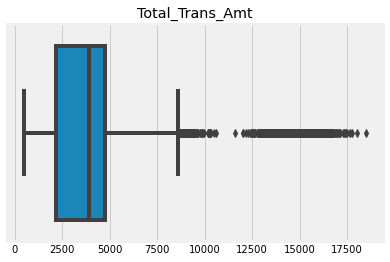

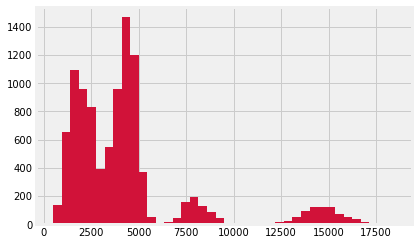

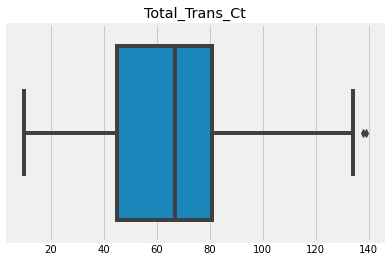

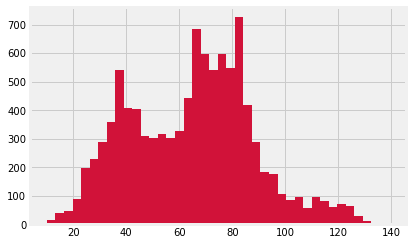

In [15]:
for col in df.columns:
    if df[col].dtype == 'int64':
        plot_outliers(df,col)
        plot_hist(df,col)

In [16]:
df.Attrition_Flag.unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [17]:
df.head()


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [18]:
### It is a function, which given two parameters, 
### to creates a pivot table and a bar chart to show their relationship 

def make_pivot (param1, param2):
    df_slice = df[[param1, param2]]
    slice_pivot = df_slice.pivot_table(index=[param1], columns=[param2],aggfunc=np.size, fill_value=0)
    
    p_chart = slice_pivot.plot.bar()
    for p in p_chart.patches:
        p_chart.annotate(str(p.get_height()), (p.get_x() * 1.05, p.get_height() * 1.01))
    
    return slice_pivot
    return p_chart

In [19]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)


## Q

In [20]:
pd.crosstab(df['Gender'], df['Attrition_Flag'], margins = True, margins_name = "Total")

Attrition_Flag,Attrited Customer,Existing Customer,Total
Gender,,,
F,930,4428,5358
M,697,4072,4769
Total,1627,8500,10127


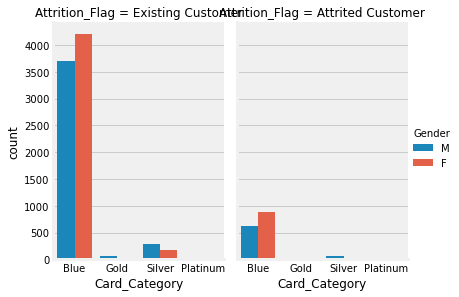

In [21]:
sns.catplot(x="Card_Category", hue="Gender", col="Attrition_Flag",
                data=df, kind="count",
                height=4, aspect=.7);


## What is the most Income Category based on Attrition Flag?

Income_Category,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Unknown
Attrition_Flag,,,,,,
Attrited Customer,252,542,378,484,1224,374
Existing Customer,1202,3038,2426,2586,5898,1850


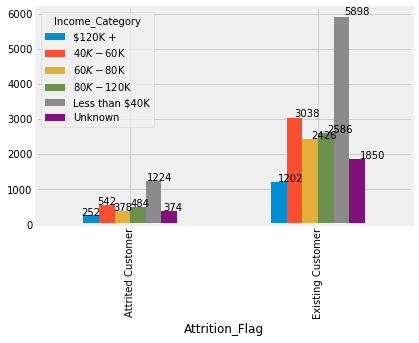

In [22]:
make_pivot("Attrition_Flag","Income_Category")

## Is the Education Level affect on the Income Category?

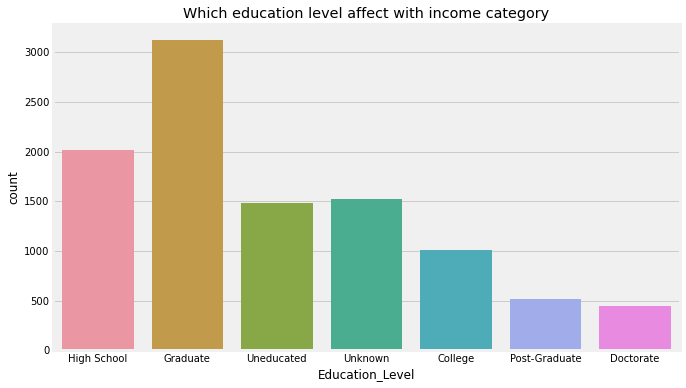

In [23]:
df[['Income_Category', 'Education_Level']].groupby(['Education_Level'], sort = True).sum()
plt.figure(figsize=(10, 6))
plt.title('Which education level affect with income category')
sns.countplot(df['Education_Level']);

##  Does `Customer_Age` influnce the `Marital_Status`?

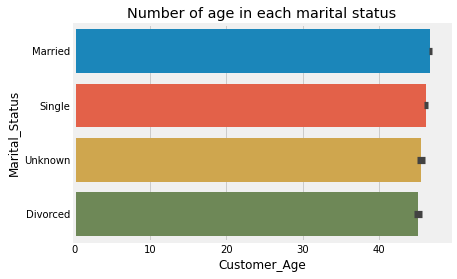

In [24]:
show = sns.barplot(df['Customer_Age'], df['Marital_Status'])
show.set_title("Number of age in each marital status");

## Which income category can be types with card category?

In [25]:
##############

In [26]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


#### apply a new data type (`category`) to our categorical feature

In [27]:
cat_types = ['bool','object','category']
data_c = df.copy()
data_c[data_c.select_dtypes(cat_types).columns] = data_c.select_dtypes(cat_types).apply(lambda x: x.astype('category'))

In [28]:
Attrition_s = {'Existing Customer':0, 'Attrited Customer':1}
data_c['Attrition_Flag'] = data_c['Attrition_Flag'].map(Attrition_s)

In [29]:
X = data_c.drop('Attrition_Flag',errors='ignore',axis=1)
y = data_c['Attrition_Flag']

In [30]:
data_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           10127 non-null  category
 5   Marital_Status            10127 non-null  category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

In [31]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res) 

In [32]:
features_to_encode = X.select_dtypes('category').columns.to_list()
for feature in features_to_encode:
    X = encode_and_bind(X, feature)

In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer_Age                    10127 non-null  int64  
 1   Dependent_count                 10127 non-null  int64  
 2   Months_on_book                  10127 non-null  int64  
 3   Total_Relationship_Count        10127 non-null  int64  
 4   Months_Inactive_12_mon          10127 non-null  int64  
 5   Contacts_Count_12_mon           10127 non-null  int64  
 6   Credit_Limit                    10127 non-null  float64
 7   Total_Revolving_Bal             10127 non-null  int64  
 8   Avg_Open_To_Buy                 10127 non-null  float64
 9   Total_Amt_Chng_Q4_Q1            10127 non-null  float64
 10  Total_Trans_Amt                 10127 non-null  int64  
 11  Total_Trans_Ct                  10127 non-null  int64  
 12  Total_Ct_Chng_Q4_Q1             

### Split to (Train-Test) dataset

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0, shuffle= True,stratify = y)

-------
## Scale

In [35]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_test_scaled = scaler.transform(X_test.values)

## The models

#### Random Forest Classifier

In [36]:
RFC = RandomForestClassifier(random_state = 0)
RFC.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [37]:
y_pred_RFC = RFC.predict(X_test)

In [38]:
print("Accuracy:" ,RFC.score(X_test,y_test)*100.0,'%')

Accuracy: 95.65646594274433 %


<AxesSubplot:>

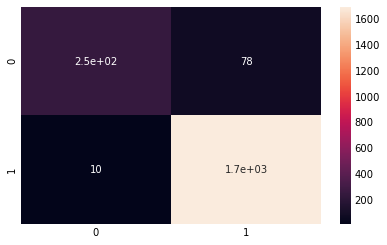

In [39]:
cm_RFC=metrics.confusion_matrix(y_test,y_pred_RFC, labels=[1,0])
#cm_RFC
sns.heatmap(cm_RFC,annot=True)

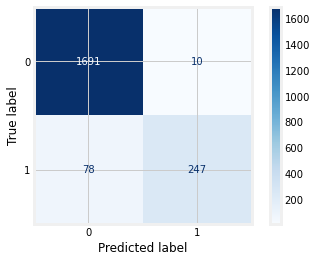

In [40]:
# Plot for Confusion Matrix

disp = plot_confusion_matrix(RFC, X_test, y_test,display_labels=RFC.classes_,cmap=plt.cm.Blues)
disp


In [41]:
print(metrics.classification_report(y_test,y_pred_RFC, labels=[1,0]))
print('Accuracy_Score:',accuracy_score(y_test,y_pred_RFC)*100,'%')
print('Recall:',metrics.recall_score(y_test,y_pred_RFC)*100,'%')

              precision    recall  f1-score   support

           1       0.96      0.76      0.85       325
           0       0.96      0.99      0.97      1701

    accuracy                           0.96      2026
   macro avg       0.96      0.88      0.91      2026
weighted avg       0.96      0.96      0.95      2026

Accuracy_Score: 95.65646594274433 %
Recall: 76.0 %


#### Logistic Regression

In [42]:
# Train the model

lr = LogisticRegression(random_state = 0)
lr.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [43]:
y_pred_lr = lr.predict(X_test_scaled)

In [44]:
print("Accuracy:" ,lr.score(X_test_scaled,y_test)*100.0,'%')

Accuracy: 90.76999012833168 %


<AxesSubplot:>

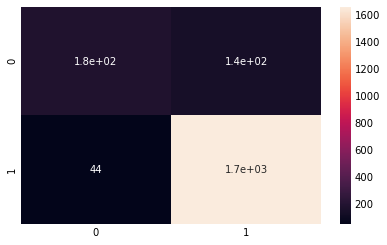

In [45]:
cm_lr=metrics.confusion_matrix(y_test,y_pred_lr, labels=[1,0])
cm_lr
sns.heatmap(cm_lr,annot=True)

In [46]:
print(metrics.classification_report(y_test,y_pred_lr, labels=[1,0]))
print('Accuracy_Score:',accuracy_score(y_test,y_pred_lr)*100,'%')
print('Recall:',metrics.recall_score(y_test,y_pred_lr)*100,'%')

              precision    recall  f1-score   support

           1       0.81      0.56      0.66       325
           0       0.92      0.97      0.95      1701

    accuracy                           0.91      2026
   macro avg       0.86      0.77      0.80      2026
weighted avg       0.90      0.91      0.90      2026

Accuracy_Score: 90.76999012833168 %
Recall: 56.00000000000001 %


#### Decision Tree Classifier

In [47]:
# Train the model
dtc = tree.DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [48]:
y_pred_dtc = dtc.predict(X_test)

In [49]:
print("Accuracy:" ,dtc.score(X_test,y_test)*100.0,'%')

Accuracy: 94.32379072063178 %


<AxesSubplot:>

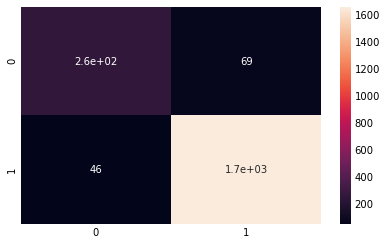

In [50]:
cm_dtc=metrics.confusion_matrix(y_test,y_pred_dtc, labels=[1,0])
cm_dtc
sns.heatmap(cm_dtc,annot=True)

In [51]:
print(metrics.classification_report(y_test,y_pred_dtc, labels=[1,0]))
print('Accuracy_Score:',accuracy_score(y_test,y_pred_dtc)*100,'%')
print('Recall:',metrics.recall_score(y_test,y_pred_dtc)*100,'%')

              precision    recall  f1-score   support

           1       0.85      0.79      0.82       325
           0       0.96      0.97      0.97      1701

    accuracy                           0.94      2026
   macro avg       0.90      0.88      0.89      2026
weighted avg       0.94      0.94      0.94      2026

Accuracy_Score: 94.32379072063178 %
Recall: 78.76923076923077 %


## parameter for gridsearchcv

In [52]:
param_dict = {
    "criterion":['gini','entropy'],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,5)
    
}

## finding best hyperparameter using gridsearchcv

In [53]:
grid = GridSearchCV(dtc,
                   param_grid=param_dict,
                   cv=10,
                   verbose=1,
                   n_jobs=-1)
grid.fit(X_train,y_train)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

## finding the best hyperparameter.

In [54]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 6}

In [55]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=8, min_samples_split=6, random_state=0)

In [56]:
grid.best_score_

0.9428477264769907

In [57]:
xgb=XGBClassifier()

In [58]:
xgb.fit(X_train,y_train)

[20:35:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [59]:
y_pred_xgb = xgb.predict(X_test)

<AxesSubplot:>

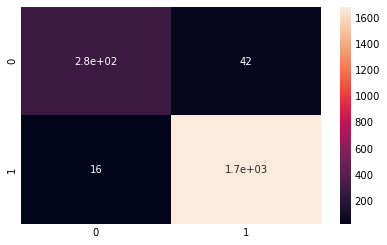

In [60]:
cm_xgb=metrics.confusion_matrix(y_test,y_pred_xgb, labels=[1,0])
sns.heatmap(cm_xgb,annot=True)

In [61]:
print(metrics.classification_report(y_test,y_pred_xgb, labels=[1,0]))
print('Accuracy_Score:',accuracy_score(y_test,y_pred_xgb)*100,'%')
print('Recall:',metrics.recall_score(y_test,y_pred_xgb)*100,'%')

              precision    recall  f1-score   support

           1       0.95      0.87      0.91       325
           0       0.98      0.99      0.98      1701

    accuracy                           0.97      2026
   macro avg       0.96      0.93      0.95      2026
weighted avg       0.97      0.97      0.97      2026

Accuracy_Score: 97.13721618953603 %
Recall: 87.07692307692308 %


In [62]:
lgbm=LGBMClassifier()

In [63]:
lgbm.fit(X_train,y_train)

LGBMClassifier()

In [64]:
y_pred_lgbm = lgbm.predict(X_test)

<AxesSubplot:>

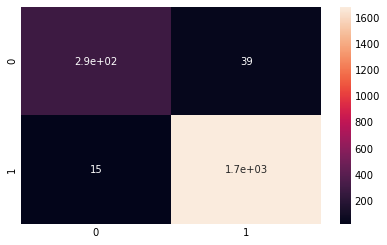

In [65]:
cm_lgbm=metrics.confusion_matrix(y_test,y_pred_lgbm, labels=[1,0])
sns.heatmap(cm_lgbm,annot=True)

In [66]:
print(metrics.classification_report(y_test,y_pred_lgbm, labels=[1,0]))
print('Accuracy_Score:',accuracy_score(y_test,y_pred_lgbm)*100,'%')
print('Recall:',metrics.recall_score(y_test,y_pred_lgbm)*100,'%')

              precision    recall  f1-score   support

           1       0.95      0.88      0.91       325
           0       0.98      0.99      0.98      1701

    accuracy                           0.97      2026
   macro avg       0.96      0.94      0.95      2026
weighted avg       0.97      0.97      0.97      2026

Accuracy_Score: 97.33464955577492 %
Recall: 88.0 %


# Dealing with the imbalanced data

In [67]:
y_test.value_counts()

0    1701
1     325
Name: Attrition_Flag, dtype: int64

In [68]:
# Before
one_count=0
zero_count=0
for i in y:
    if i==1:
        one_count+=1
    else:
        zero_count+=1
print('The number of 0 are:',zero_count)
print('The number of 1 are:',one_count)

The number of 0 are: 8500
The number of 1 are: 1627


In [69]:
X_train2, X_test2, y_train2, y_test2 = train_test_split( X, y, test_size=0.2, random_state=20,shuffle=True)

In [70]:
# Trying out oversampling
oversample = SMOTE()
X_train2, y_train2 = oversample.fit_resample(X_train2, y_train2)

In [71]:
# After
one_count=0
zero_count=0
for i in y_train:
    if i==1:
        one_count+=1
    else:
        zero_count+=1
print('The number of 0 are:',zero_count)
print('The number of 1 are:',one_count)

The number of 0 are: 6799
The number of 1 are: 1302


In [72]:
lgbm2=LGBMClassifier()

In [73]:
lgbm2.fit(X_train2,y_train2)

LGBMClassifier()

In [74]:
print('The accuracy score:',accuracy_score(y_test2,lgbm2.predict(X_test2))*100,'%')

The accuracy score: 97.18657453109576 %


<AxesSubplot:>

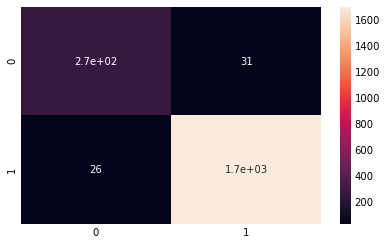

In [75]:
cf=metrics.confusion_matrix(y_test2,lgbm2.predict(X_test2), labels=[1,0])
sns.heatmap(cf,annot=True)

In [76]:
# Making the Report of the model

print(metrics.classification_report(y_test2,lgbm2.predict(X_test2), labels=[1,0]))
print('Accuracy_Score:',accuracy_score(y_test2,lgbm2.predict(X_test2))*100,'%')
print('Recall:',metrics.recall_score(y_test2,lgbm2.predict(X_test2))*100,'%')

              precision    recall  f1-score   support

           1       0.91      0.90      0.90       301
           0       0.98      0.98      0.98      1725

    accuracy                           0.97      2026
   macro avg       0.95      0.94      0.94      2026
weighted avg       0.97      0.97      0.97      2026

Accuracy_Score: 97.18657453109576 %
Recall: 89.70099667774086 %


In [77]:
X_train3, X_test3, y_train3, y_test3 = train_test_split( X, y, test_size=0.2, random_state=21)

In [78]:
# Before
one_count=0
zero_count=0
for i in y_train3:
    if i==1:
        one_count+=1
    else:
        zero_count+=1
print('The number of 0 are:',zero_count)
print('The number of 1 are:',one_count)

The number of 0 are: 6817
The number of 1 are: 1284


In [79]:
sme = SMOTEENN(random_state=21)

In [80]:
X_train3,y_train3=sme.fit_resample(X_train3,y_train3)

In [81]:
# After
one_count=0
zero_count=0
for i in y_train3:
    if i==1:
        one_count+=1
    else:
        zero_count+=1
print('The number of 0 are:',zero_count)
print('The number of 1 are:',one_count)

The number of 0 are: 5383
The number of 1 are: 5749


In [82]:
lgbm3=LGBMClassifier()

In [83]:
lgbm3.fit(X_train3,y_train3)

LGBMClassifier()

In [84]:
print('the accuracy score:',accuracy_score(y_test3,lgbm3.predict(X_test3))*100,'%')

the accuracy score: 95.70582428430404 %


<AxesSubplot:>

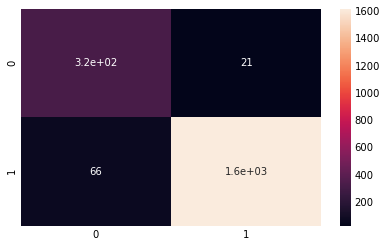

In [85]:
cf=metrics.confusion_matrix(y_test3,lgbm3.predict(X_test3), labels=[1,0])
sns.heatmap(cf,annot=True)

In [86]:
# Making the Report of the model

print(metrics.classification_report(y_test3,lgbm3.predict(X_test3), labels=[1,0]))
print('Accuracy_Score:',accuracy_score(y_test3,lgbm3.predict(X_test3))*100,'%')
print('Recall:',metrics.recall_score(y_test3,lgbm3.predict(X_test3))*100,'%')

              precision    recall  f1-score   support

           1       0.83      0.94      0.88       343
           0       0.99      0.96      0.97      1683

    accuracy                           0.96      2026
   macro avg       0.91      0.95      0.93      2026
weighted avg       0.96      0.96      0.96      2026

Accuracy_Score: 95.70582428430404 %
Recall: 93.87755102040816 %


# A pipeline using Borderline SMOTE and RandomUnderSampling

In [87]:
over = BorderlineSMOTE(sampling_strategy=0.3)
under = RandomUnderSampler(sampling_strategy=0.6)
steps = [('o', over), ('u', under)]

In [88]:
X_train4, X_test4, y_train4, y_test4 = train_test_split( X, y, test_size=0.2, random_state=21)

In [89]:
# Before
one_count=0
zero_count=0
for i in y_train4:
    if i==1:
        one_count+=1
    else:
        zero_count+=1
print('The number of 0 are:',zero_count)
print('The number of 1 are:',one_count)

The number of 0 are: 6817
The number of 1 are: 1284


In [90]:
pipeline = Pipeline(steps=steps)
# transform the dataset
X_train4, y_train4 = pipeline.fit_resample(X_train4,y_train4)

In [91]:
# After
one_count=0
zero_count=0
for i in y_train4:
    if i==1:
        one_count+=1
    else:
        zero_count+=1
print('The number of 0 are:',zero_count)
print('The number of 1 are:',one_count)

The number of 0 are: 3408
The number of 1 are: 2045


In [92]:
lgbm4=LGBMClassifier()

In [93]:
lgbm4.fit(X_train4,y_train4)

LGBMClassifier()

In [94]:
print('The accuracy score:',accuracy_score(y_test4,lgbm4.predict(X_test4))*100,'%')

The accuracy score: 97.13721618953603 %


<AxesSubplot:>

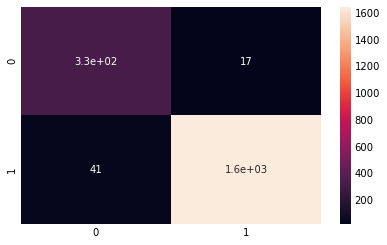

In [95]:
cf=metrics.confusion_matrix(y_test4,lgbm4.predict(X_test4), labels=[1,0])
sns.heatmap(cf,annot=True)

In [96]:
# Making the Report of the model

print(metrics.classification_report(y_test4,lgbm4.predict(X_test4), labels=[1,0]))
print('Accuracy_Score:',accuracy_score(y_test4,lgbm4.predict(X_test4))*100,'%')
print('Recall:',metrics.recall_score(y_test4,lgbm4.predict(X_test4))*100,'%')

              precision    recall  f1-score   support

           1       0.89      0.95      0.92       343
           0       0.99      0.98      0.98      1683

    accuracy                           0.97      2026
   macro avg       0.94      0.96      0.95      2026
weighted avg       0.97      0.97      0.97      2026

Accuracy_Score: 97.13721618953603 %
Recall: 95.04373177842565 %
